# Tutorial Content

This notebook will walk you through steps to read in and organize velocity data in a raster format using xarray and rioxarray tools

First, lets install the python libraries that were listed on the [Software](software.ipynb) page:

In [1]:
import geopandas as gpd
import os
import numpy as np
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt
from geocube.api.core import make_geocube
import xarray as xr
import numpy as np
import pandas as pd
import packaging
import pyproj

In [2]:
gen_path = '/Users/emmamarshall/Desktop/phd_research/siparcs/'

In [3]:
#data
itslive = rxr.open_rasterio('/Users/emmamarshall/Desktop/phd_research/siparcs/HMA_G0120_0000.nc').squeeze()


In [4]:
itslive.v


<xarray.DataArray 'v' (y: 15904, x: 23440)>
[372789760 values with dtype=float32]
Coordinates:
  * y               (y) float64 1.643e+06 1.643e+06 ... -2.648e+05 -2.649e+05
  * x               (x) float64 -2.16e+06 -2.16e+06 ... 6.526e+05 6.527e+05
    band            int64 1
    UTM_Projection  int64 0
Attributes:
    map_scale_corrected:  1
    missing_value:        -32767
    quality_cutoff:       7
    standard_name:        velocity
    units:                m/y
    _FillValue:           -32767.0
    scale_factor:         1.0
    add_offset:           0.0

In [5]:
itslive.rio.crs.from_wkt

<bound method CRS.from_wkt of <class 'rasterio.crs.CRS'>>

In [6]:
type(itslive)
itslive.rio.crs

CRS.from_wkt('PROJCS["Asia_North_Lambert_Conformal_Conic",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["false_easting",0],PARAMETER["false_northing",0],PARAMETER["central_meridian",95],PARAMETER["standard_parallel_1",15],PARAMETER["standard_parallel_2",65],PARAMETER["latitude_of_origin",30],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","102027"]]')

In [7]:
#read in vector data 
se_asia = gpd.read_file('/Users/emmamarshall/Downloads/15rgi60SouthAsiaEast/15_rgi60_SouthAsiaEast.shp')
#sw_asia = gpd.read_file('/Users/emmamarshall/Desktop/phd_research/nisar_prepwork/rgi_1km/sw_asia_1km.shp')
#c_asia = gpd.read_file('/Users/emmamarshall/Desktop/phd_research/nisar_prepwork/rgi_1km/central_asia_1km.shp') 

#se_asia_path = '/Users/emmamarshall/Desktop/phd_research/nisar_prepwork/rgi_1km/se_asia_1km.shp'
#sw_asia_path = '/Users/emmamarshall/Desktop/phd_research/nisar_prepwork/rgi_1km/sw_asia_1km.shp'
#c_asia_path = '/Users/emmamarshall/Desktop/phd_research/nisar_prepwork/rgi_1km/central_asia_1km.shp'




In [8]:
se_asia_prj = se_asia.to_crs('+proj=lcc +lat_1=15 +lat_2=65 +lat_0=30 +lon_0=95 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m no_defs'
                             )

<AxesSubplot:>

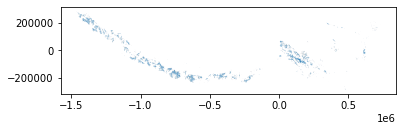

In [9]:
se_asia_prj.plot()

<AxesSubplot:title={'center':'band = 1, UTM_Projection = 0'}, xlabel='x coordinate of projection [m]', ylabel='y coordinate of projection [m]'>

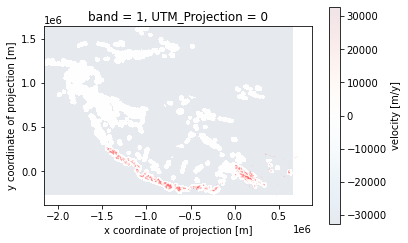

In [10]:
fig, ax = plt.subplots()

itslive.v.plot.imshow(ax=ax, alpha = 0.1)
se_asia_prj.plot(ax=ax, color='red')


In [11]:
se_asia_prj['Unique_ID'] = se_asia_prj.index.astype(int)
se_asia_prj

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry,Unique_ID
0,RGI60-15.00001,G102044E29941N,19990920,-9999999,102.044042,29.941000,15,3,0.438,4996,...,850,0,0,0,0,9,9,None,"POLYGON ((626747.322 19334.286, 626747.214 193...",0
1,RGI60-15.00002,G102042E29987N,19990920,-9999999,102.042346,29.987019,15,3,0.644,4947,...,1021,0,0,0,0,9,9,None,"POLYGON ((626699.144 24673.098, 626701.110 246...",1
2,RGI60-15.00003,G102041E29997N,19990920,-9999999,102.041130,29.997311,15,3,0.225,5019,...,812,0,0,0,0,9,9,None,"POLYGON ((626205.858 25396.784, 626210.489 254...",2
3,RGI60-15.00004,G102050E29962N,19990920,-9999999,102.050283,29.962297,15,3,0.985,4622,...,2318,0,0,0,0,9,9,None,"POLYGON ((627054.150 21582.052, 627057.905 216...",3
4,RGI60-15.00005,G102044E30025N,19990920,-9999999,102.043728,30.025101,15,3,0.465,4733,...,913,0,0,0,0,9,9,None,"POLYGON ((626913.162 28267.766, 626895.820 282...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,RGI60-15.13115,G081977E30337N,20090918,-9999999,81.977000,30.337000,15,1,1.356,5480,...,1856,0,0,0,0,9,9,CN5Z342A0003,"POLYGON ((-1150121.533 121963.660, -1150118.27...",13114
13115,RGI60-15.13116,G081991E30339N,20090918,-9999999,81.991000,30.339000,15,1,7.427,5266,...,5779,0,0,0,0,9,9,CN5Z342A0003,"POLYGON ((-1148353.222 121707.808, -1148328.34...",13115
13116,RGI60-15.13117,G081355E30440N,20070912,-9999999,81.355000,30.440000,15,1,6.788,5696,...,5519,0,0,0,0,9,9,CN5Z342B0006,"POLYGON ((-1204224.276 142125.331, -1204220.83...",13116
13117,RGI60-15.13118,G081361E30451N,20070912,-9999999,81.361000,30.451000,15,1,0.043,5969,...,527,0,0,0,0,9,9,None,"POLYGON ((-1202593.561 141849.818, -1202579.07...",13117


In [12]:
def rasterize_vector(gpdf_prj, raster_obj):  #for now, project objects outside of fn
    
    #use index as a unique key for each glacier
    gpdf_prj['Integer_ID'] = gpdf_prj.index.astype(int)
    #print(gpdf_utm['Integer_ID'])
    
    #rasterize glacier vector by unique id 

    out_grid = make_geocube(
            vector_data = gpdf_prj,
            measurements = ['Integer_ID'],
            like = raster_obj['v'] #need to specify a var here, not sure best way to do that
            )
    
    #now merge the rasterized vector and the original raster togehter into a geocube
    out_grid['speed'] = (raster_obj.dims, raster_obj.v.values, raster_obj.attrs, raster_obj.encoding)
    
    #now, get velocity statistics of each 'region' (integer) using the mask
    #grouped_ID = out_grid.drop('spatial_ref').groupby(out_grid.Integer_ID)

    #compute zonal stats groupedd by ID
    #grid_mean_sp = grouped_ID.mean().rename({'speed': 'speed_mean'})
    #grid_min_sp = grouped_ID.min().rename({'speed': 'speed_min'})
    #grid_max_sp = grouped_ID.max().rename({'speed': 'speed_max'})
    #grid_std_sp = grouped_ID.max().rename({'speed': 'speed_std'})
    
    #merge each zonal stat xr obj into a single xr obj, convert to pandas df
    #zonal_stats = xr.merge([grid_mean_sp, grid_min_sp, grid_max_sp, grid_std_sp]).to_dataframe()
    #zonal_stats = zonal_stats.reset_index()
    
   # return zonal_stats
    return out_grid

In [13]:
outgrid_seasia = rasterize_vector(se_asia_prj, itslive)


In [15]:
outgrid_seasia

<xarray.Dataset>
Dimensions:      (y: 15904, x: 23440)
Coordinates:
  * y            (y) float64 1.643e+06 1.643e+06 ... -2.648e+05 -2.649e+05
  * x            (x) float64 -2.16e+06 -2.16e+06 ... 6.526e+05 6.527e+05
    spatial_ref  int64 0
Data variables:
    Integer_ID   (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    speed        (y, x) float32 -3.277e+04 -3.277e+04 ... -3.277e+04 -3.277e+04

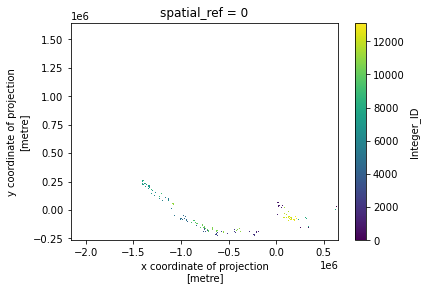

In [14]:
outgrid_seasia.Integer_ID.plot.imshow()

In [16]:
grouped_ID = outgrid_seasia.drop('spatial_ref').groupby(outgrid_seasia.Integer_ID)

In [22]:
grid_mean_sp = grouped_ID.mean().rename({'speed': 'speed_mean'})
grid_median_sp = grouped_ID.median().rename({'speed': 'speed_median'})
grid_min_sp = grouped_ID.min().rename({'speed': 'speed_min'})
grid_max_sp = grouped_ID.max().rename({'speed': 'speed_max'})
#grid_std_sp = grouped_ID.max().rename({'speed': 'speed_std'})

AttributeError: 'DatasetGroupBy' object has no attribute 'nanmean'

In [19]:
zonal_stats = xr.merge([grid_mean_sp, grid_median_sp, grid_min_sp, grid_max_sp, grid_std_sp]).to_dataframe()
zonal_stats = zonal_stats.reset_index()
zonal_stats

,Integer_ID,speed_mean,spatial_ref,speed_median,speed_min,speed_max,speed_std
0,0.0,1.429309,0,1.062750,0.207010,3.308097,3.308097
1,1.0,1.122728,0,1.084215,0.117091,2.706474,2.706474
2,2.0,0.684039,0,0.566495,0.168167,1.239840,1.239840
3,3.0,1.371010,0,1.080240,0.069117,4.493991,4.493991
4,4.0,0.368665,0,0.336003,0.038937,0.815943,0.815943
...,...,...,...,...,...,...,...
12980,13114.0,0.696448,0,0.661229,0.017998,1.925924,1.925924
12981,13115.0,6.024704,0,4.589444,0.110033,21.763865,21.763865
12982,13116.0,1.995819,0,1.357111,0.075239,6.905484,6.905484
12983,13117.0,0.599954,0,0.596890,0.322914,0.880058,0.880058


In [20]:
#now, trying to merge zonal stats df back with original glacier df on integer_ID col
se_asia_glacier_data = se_asia_prj.merge(zonal_stats, on='Integer_ID')


<AxesSubplot:xlabel='Integer_ID', ylabel='speed_mean'>

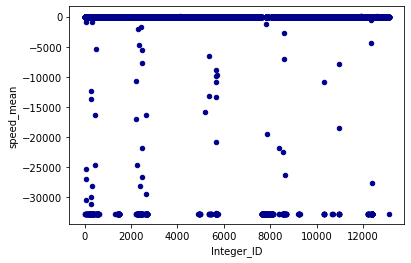

In [21]:
zonal_stats['speed_mean']

fig, ax = plt.subplots()
se_asia_glacier_data.plot.scatter(x='Integer_ID',y = 'speed_mean', c = 'darkblue', ax=ax)


In [33]:
zonal_stats['speed_mean'].min()

0.014607632

<AxesSubplot:>

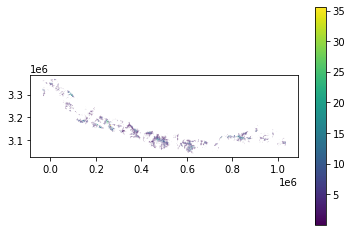

In [34]:
se_asia_glacier_data.plot(column='speed_mean', legend=True)